<a href="https://colab.research.google.com/github/drxiangma/drxiangma.github.io/blob/main/Lab14_PCA_MaXiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time

In [3]:
# Fetch the Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=True)
data = pd.DataFrame(fashion_mnist['data'])
target = pd.Series(fashion_mnist['target'])

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


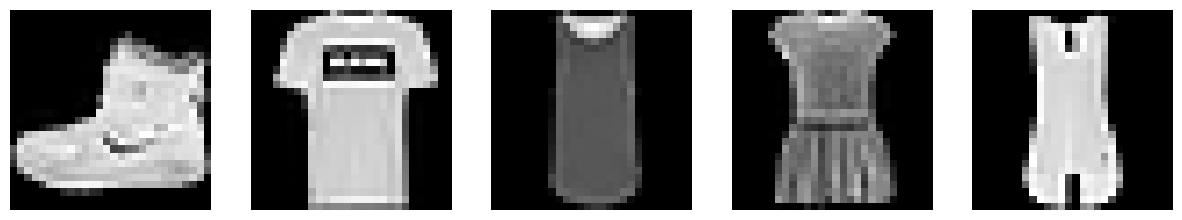

In [4]:
# Visualizing the first 5 images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
  ax.imshow(data.iloc[i].values.reshape(28, 28), cmap='gray')
  ax.axis('off')
plt.show()

In [6]:
# Convert target to integers
target = target.astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [7]:
# Task 2: PCA Projection to 4 Dimensions
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [8]:
# Task 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio for each principal component: ')
print(explained_variance_ratio)

Explained variance ratio for each principal component: 
[0.2206848  0.14361633 0.05448752 0.05104747]


In [21]:
# Task 4: Preserving the Training Set's Variance
target_variances = [0.25, 0.5, 0.75, 0.95]
num_components_required = []
cumulative_variance = 0
for explained_variance in explained_variance_ratio:
  cumulative_variance += explained_variance
  #if cumulative_variance >= target_variances[0]:
  num_components_required.append(len(num_components_required) + 1)
  target_variances.pop(0)

print('Number of components required to obtain specified varainces: ')
#print(num_components_required)
for var, num_comp in zip([0.25, 0.5, 0.75, 0.95], num_components_required):
  print(f'{var*100:.0f}% variance: {num_comp}')

Number of components required to obtain specified varainces: 
25% variance: 1
50% variance: 2
75% variance: 3
95% variance: 4


In [13]:
# Task 5: Dataset Compression Using PCA (95% variance)
pca_95 = PCA(n_components=0.95)
X_tain_pca_95 = pca_95.fit_transform(X_train_std)
X_test_pca_95 = pca_95.transform(X_test_std)

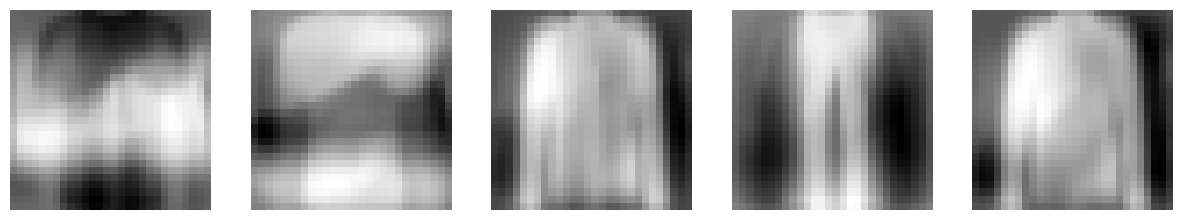

In [15]:
# Visualizing the first 5 images after PCA
reconstructed_images = pca.inverse_transform(X_train_pca[:5])

# Reshape the reconstructed images to original shape (28x28)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

# Plot the reconstructed images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i], cmap='gray')
    ax.axis('off')
plt.show()

In [17]:
#Task 6: Displaying the Size of the Original and Reduced Datasets
original_size = X_train_std.nbytes
reduced_size = X_tain_pca_95.nbytes
print(f"Size of the original dataset: {original_size} bytes")
print(f"Size of the reduced dataset (95% variance): {reduced_size} bytes")

Size of the original dataset: 351232000 bytes
Size of the reduced dataset (95% variance): 114688000 bytes


In [19]:
# Task 7: Compare Classifier Speed
classifier = LogisticRegression(max_iter=500)

start_time_original = time.time()
classifier.fit(X_train_std, y_train)
end_time_original = time.time()
time_original = end_time_original - start_time_original

start_time_pca = time.time()
classifier.fit(X_tain_pca_95, y_train)
end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca

print(f"Time taken to fit the classifier on the original dataset: {time_original:.4f} seconds")
print(f"Time taken to fit the classifier on the reduced dataset (95% variance): {time_pca:.4f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time taken to fit the classifier on the original dataset: 102.4663 seconds
Time taken to fit the classifier on the reduced dataset (95% variance): 40.0985 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
